#### Dataset Description:

The house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 1980.   

 ##### Variables in order:
     CRIM     per capita crime rate by town
     ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
     INDUS    proportion of non-retail business acres per town
     CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
     NOX      nitric oxides concentration (parts per 10 million)
     RM       average number of rooms per dwelling
     AGE      proportion of owner-occupied units built prior to 1940
     DIS      weighted distances to five Boston employment centres
     RAD      index of accessibility to radial highways
     TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's

In [22]:
#importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading tab seprated dataset in df with header
df_house=pd.read_csv("F://somya//python_code//housing.csv",sep='\s+',header=None,names=["CRIM"  , "ZN"    , "INDUS"  , "CHAS"  , "NOX", "RM", "AGE", "DIS"  , "RAD","TAX"  , "PTRATIO" , "B"  , "LSTAT" ,"MEDV"])
df_house

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
df_house.shape
# checking features and observations count

(506, 14)

In [4]:
df_house.head(10) #checking top 10 observations

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [5]:
df_house.tail(10) #checking last 10 observations

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [6]:
df_house.info()# infromation about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


all fields are showing as int and float so there is no erroneous value in any field.

In [7]:
df_house.nunique() #checking unique values

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [8]:
# CHAS and RAD are categorical data, so changeing there data type
df_house=df_house.astype({'CHAS':'category','RAD':'category'})

In [9]:
df_house.info() # checking datatype after changing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [10]:
num=df_house.select_dtypes(include='number').columns
num # all numerical columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B',
       'LSTAT', 'MEDV'],
      dtype='object')

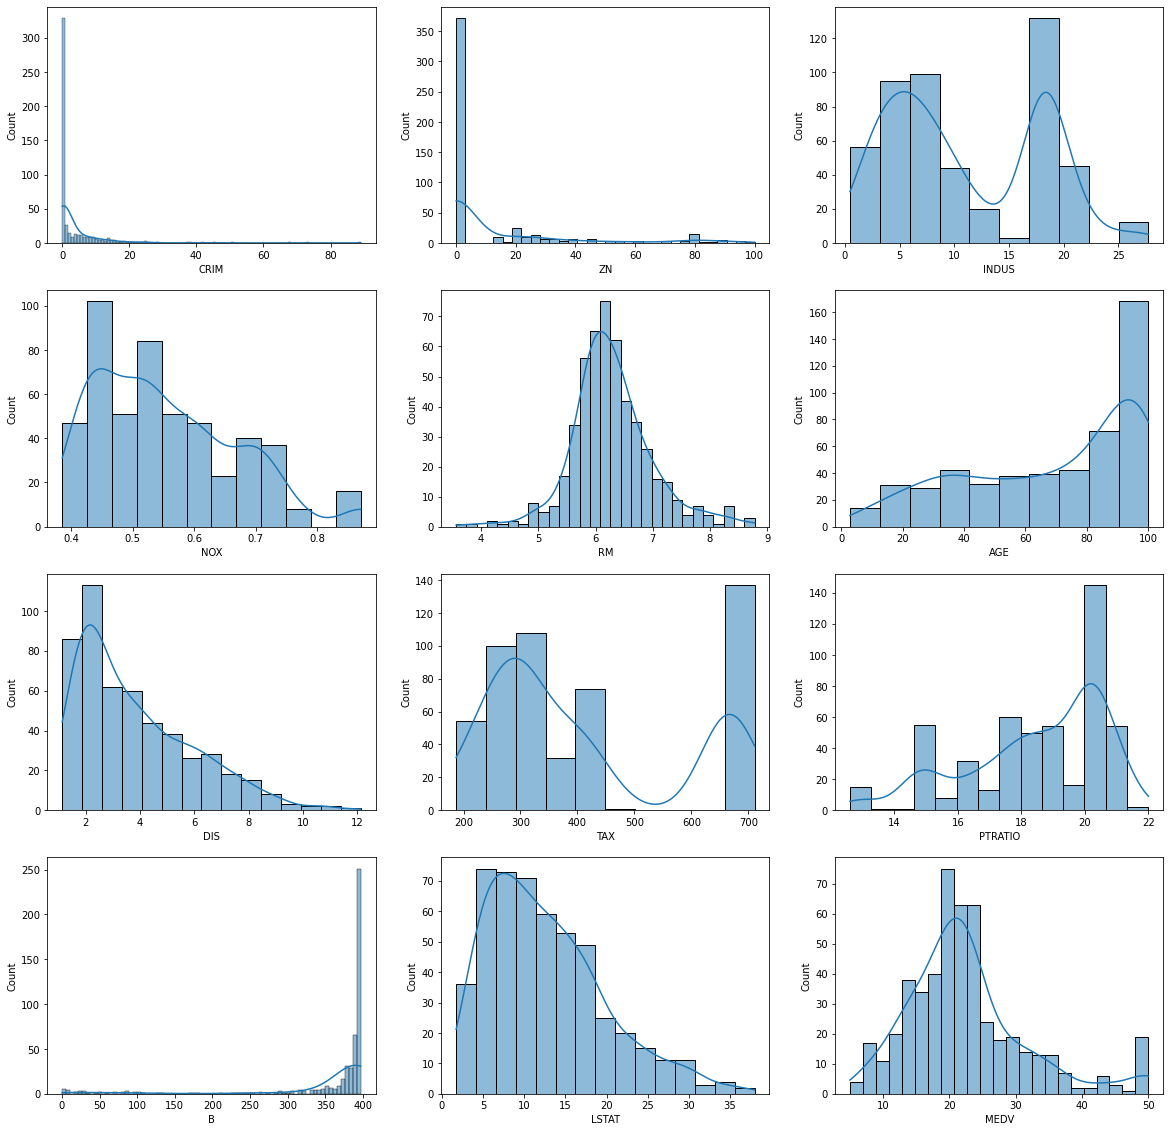

In [11]:
_,ax=plt.subplots(4,3,figsize=(20,20))
for i in range(len(num)):
    sns.histplot(data=df_house[num[i]],kde=True,ax=ax[i//3][i%3])
    

### Missing Values

In [12]:
df_house.describe(include='all') 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.0,506.000000,506.000000,506.000000,506.000000,506.0,506.000000,506.000000,506.000000,506.000000,506.000000
unique,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,471.0,NaN,NaN,NaN,NaN,132.0,NaN,NaN,NaN,NaN,NaN
mean,3.613524,11.363636,11.136779,NaN,0.554695,6.284634,68.574901,3.795043,NaN,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,NaN,0.115878,0.702617,28.148861,2.105710,NaN,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,NaN,0.385000,3.561000,2.900000,1.129600,NaN,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,NaN,0.449000,5.885500,45.025000,2.100175,NaN,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,NaN,0.538000,6.208500,77.500000,3.207450,NaN,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,NaN,0.624000,6.623500,94.075000,5.188425,NaN,666.000000,20.200000,396.225000,16.955000,25.000000


In [14]:
 df_house['ZN']=df_house['ZN'].apply(lambda x: 1 if x>0 else 0)
# ZN 0 means no one is occupy the hous, greater >0 is someone is occupy, so simply its a categorical type field

In [15]:
df_house=df_house.astype({'ZN':'category'}) #changing ZN into category type

In [16]:
df_house.ZN.value_counts() #counting ZN

0    372
1    134
Name: ZN, dtype: int64

In [17]:
df_house.drop_duplicates(inplace=True) # if any duplicate, so removing them

In [208]:
df_house.describe() #after changing fields checking them

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,174.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,505.000000,506.000000,506.000000
mean,0.366031,11.136779,0.554695,6.284634,68.574901,0.044012,408.237154,1.066487,1.737378,0.825551,1.100352
std,0.934806,6.860353,0.115878,0.702617,28.148861,0.548431,168.537116,0.043961,0.200654,0.289684,0.142444
min,-6.012891,0.460000,0.385000,3.561000,2.900000,-2.104853,187.000000,0.929679,-0.078763,-0.601258,0.475885
25%,0.222901,5.190000,0.449000,5.885500,45.025000,-0.298378,279.000000,1.049587,1.779739,0.662029,1.041929
50%,0.647580,9.690000,0.538000,6.208500,77.500000,0.153125,330.000000,1.080809,1.786723,0.887931,1.116453
75%,0.911033,18.100000,0.624000,6.623500,94.075000,0.498579,666.000000,1.100505,1.788754,1.040475,1.169032
max,1.501489,27.740000,0.871000,8.780000,100.000000,0.914446,711.000000,1.128508,1.789036,1.291103,1.364055


In [18]:
#checking null or missing values
df_house_null=df_house.isnull()

In [19]:
df_house_null.sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

no null Missing values in dataset


In [20]:
def check_outliners(column):  #function for checking outliners using plot
    sns.histplot(x=df_house[column],kde=True)
    plt.axvline(x=df_house[column].mean(),ls='--',color='red',alpha=0.5,Label='Mean')
    plt.axvline(x=df_house[column].median(),color='blue',alpha=0.5,label='Median') 
    plt.show()

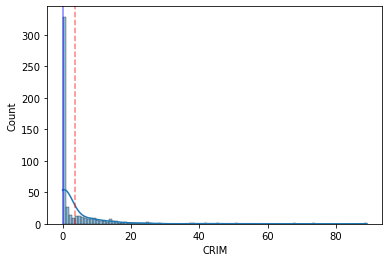

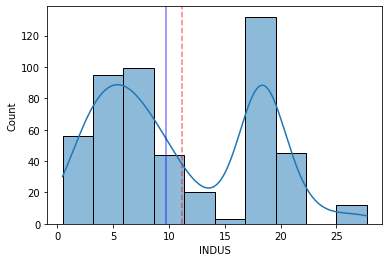

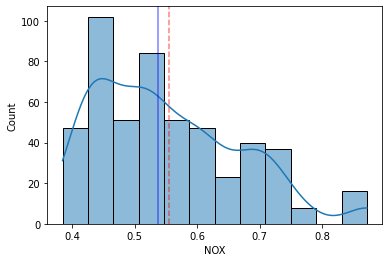

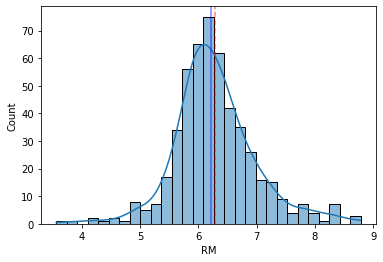

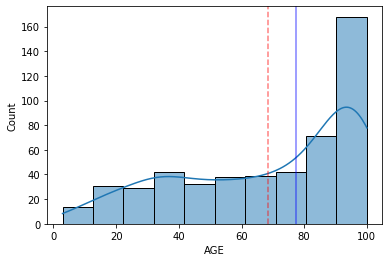

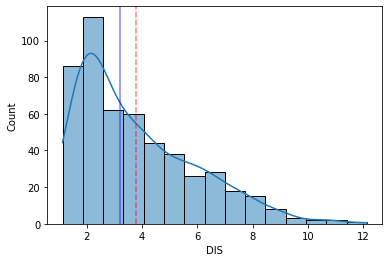

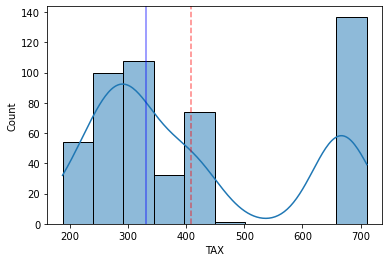

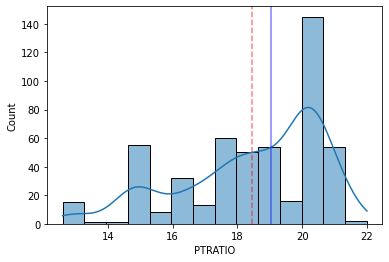

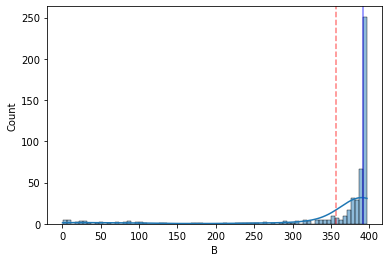

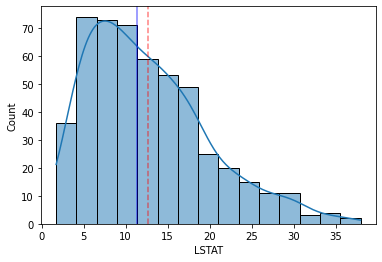

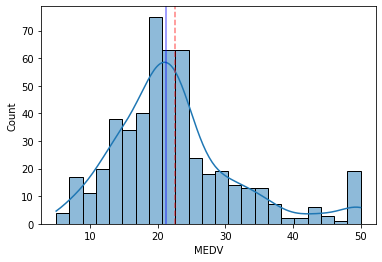

In [23]:
num=df_house.select_dtypes(include='number').columns

for column in num:
    check_outliners(column)

the features which seems having outliers:
CRIM,DIS,PTRATIO,B,LSTAT,MEDV

In [121]:
#finding outliers based on plot results using IQR Method
def check_outlier_calues(column):
    print(f"Feature is: {column}")
    Q1=np.percentile(df_house[column],25,interpolation='midpoint')
    Q2=np.percentile(df_house[column],50,interpolation='midpoint')
    Q3=np.percentile(df_house[column],75,interpolation='midpoint')
    IQR=Q3-Q1
    print(f"IQR is: {IQR}")
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    print(f"low_lim is: {low_lim}")
    print(f"up_lim is: {up_lim}")
    outlier=[]
    for x in df_house[column]:
        if ((x>up_lim) or (x<low_lim)):
            outlier.append(x)
    print(f'outlier in  {column}  is: {outlier} \n \n')



In [122]:
outlier=['CRIM','DIS','PTRATIO','B','LSTAT','MEDV']
for column in outlier:
    check_outlier_calues(column)

Feature is: CRIM
IQR is: 3.593845
low_lim is: -5.3086675
up_lim is: 9.0667125
outlier in  CRIM  is: [13.5222, 9.2323, 11.1081, 18.4982, 19.6091, 15.288, 9.82349, 23.6482, 17.8667, 88.9762, 15.8744, 9.18702, 20.0849, 16.8118, 24.3938, 22.5971, 14.3337, 11.5779, 13.3598, 38.3518, 9.91655, 25.0461, 14.2362, 9.59571, 24.8017, 41.5292, 67.9208, 20.7162, 11.9511, 14.4383, 51.1358, 14.0507, 18.811, 28.6558, 45.7461, 18.0846, 10.8342, 25.9406, 73.5341, 11.8123, 11.0874, 12.0482, 15.8603, 12.2472, 37.6619, 9.33889, 10.0623, 13.9134, 11.1604, 14.4208, 15.1772, 13.6781, 9.39063, 22.0511, 9.72418, 9.96654, 12.8023, 10.6718, 9.92485, 9.32909, 9.51363, 15.5757, 13.0751, 15.0234, 10.233, 14.3337] 
 

Feature is: DIS
IQR is: 3.0646000000000004
low_lim is: -2.496550000000001
up_lim is: 9.76185
outlier in  DIS  is: [10.7103, 10.7103, 12.1265, 10.5857, 10.5857] 
 

Feature is: PTRATIO
IQR is: 2.8000000000000007
low_lim is: 13.199999999999998
up_lim is: 24.4
outlier in  PTRATIO  is: [12.6, 12.6, 12.6, 13.

In [125]:
#findind outliers based on plot results using Z Score Method
def check_outlier_calues(column):
    outlier=[]
    z=np.abs(stats.zscore(df_house[column])) 
    threshold=3
    outlier.append(np.where(z>3))
    threshold=-3
    outlier.append(np.where(z<-3))
    print(f'outlier in  {column}  is: {outlier}  \n \n')

In [126]:
outlier=['CRIM','DIS','PTRATIO','B','LSTAT','MEDV']
for column in outlier:
    check_outlier_calues(column)

outlier in  CRIM  is: [(array([380, 398, 404, 405, 410, 414, 418, 427], dtype=int64),), (array([], dtype=int64),)]  
 

outlier in  DIS  is: [(array([351, 352, 353, 354, 355], dtype=int64),), (array([], dtype=int64),)]  
 

outlier in  PTRATIO  is: [(array([], dtype=int64),), (array([], dtype=int64),)]  
 

outlier in  B  is: [(array([102, 410, 411, 412, 415, 416, 418, 419, 423, 424, 425, 426, 427,
       429, 431, 436, 437, 438, 445, 450, 454, 455, 456, 457, 466],
      dtype=int64),), (array([], dtype=int64),)]  
 

outlier in  LSTAT  is: [(array([141, 373, 374, 412, 414], dtype=int64),), (array([], dtype=int64),)]  
 

outlier in  MEDV  is: [(array([], dtype=int64),), (array([], dtype=int64),)]  
 



Z score and IQR both methods shows we have outliners


Now trying to remove Outliners using log transformation because we already have some left skewed data

In [165]:
def log_transformation(column): # function for checking log transformation
    before =df_house[column].skew()
    after=np.log(df_house[column]).skew()
    print(f'skewness in {column} \n before: {before} \n after:  {after}')
    sns.distplot(np.log(df_house[column]))
    plt.show() 
  

In [169]:
def log10_transformation(column): # function for checking log10 transformation
    before =df_house[column].skew()
    after=np.log10(df_house[column]).skew()
    print(f'skewness in {column} \n before: {before} \n after:  {after}')
   
    sns.distplot(np.log10(df_house[column]))
    plt.show()

In [1]:
def log2_transformation(column):#  function for checking log2 transformation
    before =df_house[column].skew()
    after=np.log2(df_house[column]).skew()
    print(f'skewness in {column} \n before: {before} \n after:  {after}')   
    sns.distplot(np.log2(df_house[column]))
    plt.show()

skewness in CRIM 
 before: 5.223148798243851 
 after:  0.4059344988496048


C:\Users\somya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


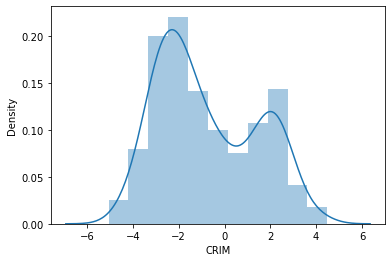

skewness in DIS 
 before: 1.0117805793009007 
 after:  0.15273013181129969


C:\Users\somya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


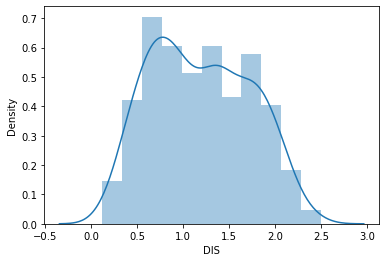

skewness in PTRATIO 
 before: -0.8023249268537809 
 after:  -1.015625274497949


C:\Users\somya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


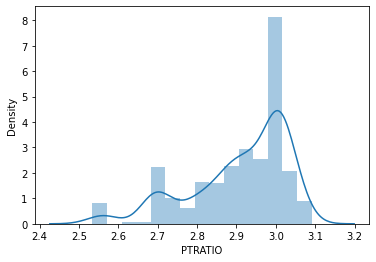

skewness in B 
 before: -2.8903737121414492 
 after:  -4.826998303936602


C:\Users\somya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


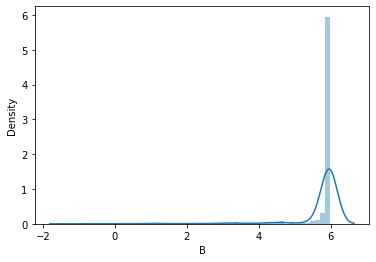

skewness in LSTAT 
 before: 0.9064600935915367 
 after:  -0.3202323581479543


C:\Users\somya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


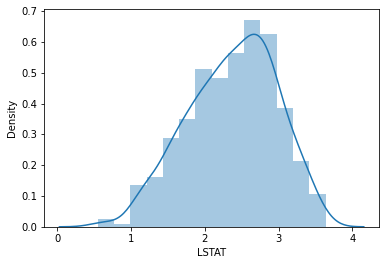

skewness in MEDV 
 before: 1.1080984082549072 
 after:  -0.33032129530987864


C:\Users\somya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


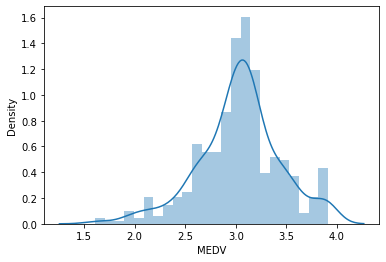

In [166]:
outlier=['CRIM','DIS','PTRATIO','B','LSTAT','MEDV']
for column in outlier:
    log_transformation(column)

skewness in CRIM 
 before: 5.223148798243851 
 after:  0.405934498849605


C:\Users\somya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


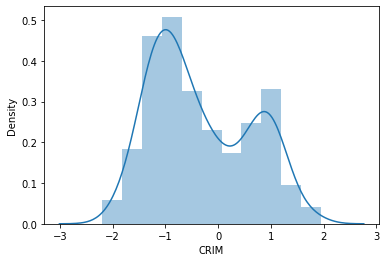

skewness in DIS 
 before: 1.0117805793009007 
 after:  0.15273013181130066


C:\Users\somya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


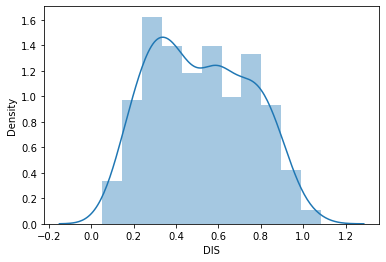

skewness in PTRATIO 
 before: -0.8023249268537809 
 after:  -1.0156252744979342


C:\Users\somya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


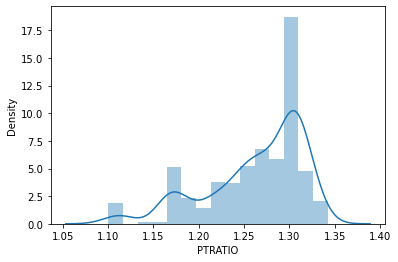

skewness in B 
 before: -2.8903737121414492 
 after:  -4.826998303936597


C:\Users\somya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


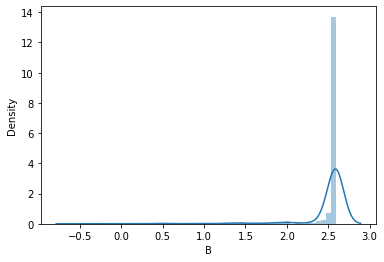

skewness in LSTAT 
 before: 0.9064600935915367 
 after:  -0.32023235814795553


C:\Users\somya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


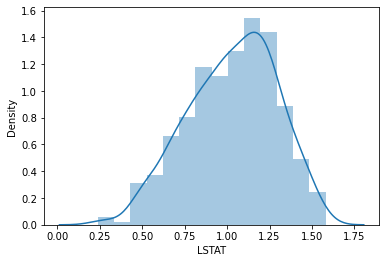

skewness in MEDV 
 before: 1.1080984082549072 
 after:  -0.33032129530987697


C:\Users\somya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


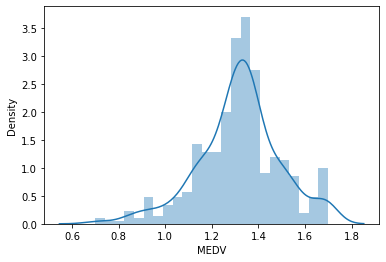

In [170]:
for column in outlier:
    log10_transformation(column)

skewness in CRIM 
 before: 5.223148798243851 
 after:  0.4059344988496044


C:\Users\somya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


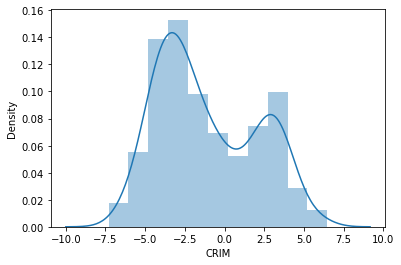

skewness in DIS 
 before: 1.0117805793009007 
 after:  0.1527301318112997


C:\Users\somya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


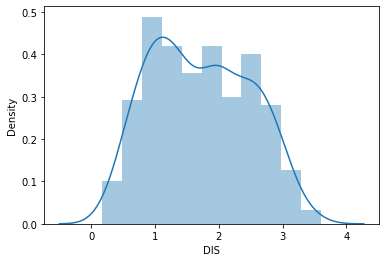

skewness in PTRATIO 
 before: -0.8023249268537809 
 after:  -1.0156252744979486


C:\Users\somya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


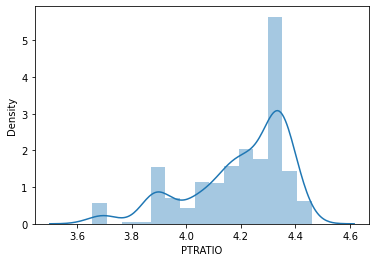

skewness in B 
 before: -2.8903737121414492 
 after:  -4.8269983039365965


C:\Users\somya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


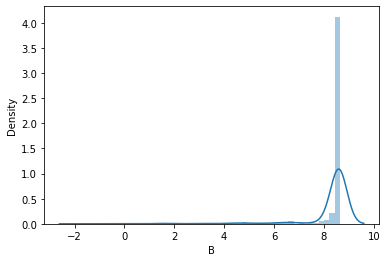

skewness in LSTAT 
 before: 0.9064600935915367 
 after:  -0.3202323581479545


C:\Users\somya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


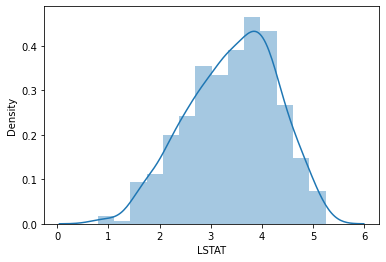

skewness in MEDV 
 before: 1.1080984082549072 
 after:  -0.3303212953098785


C:\Users\somya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


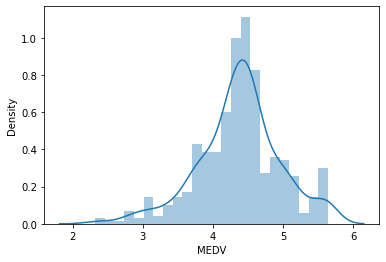

In [172]:
for column in outlier:
    log2_transformation(column)

In [175]:
from scipy.stats import boxcox
def boxcox_transformation(column): # function for checking boxcox transformation
    sns.distplot(boxcox(df_house[column])[0])
    plt.show()

C:\Users\somya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


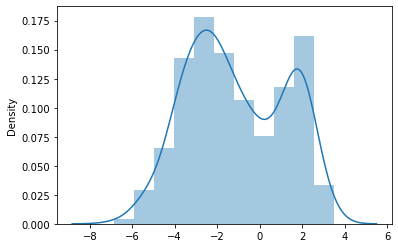

C:\Users\somya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


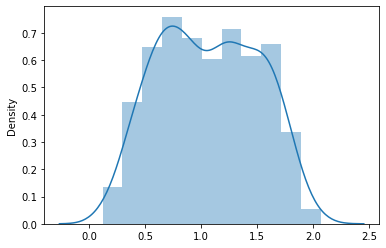

C:\Users\somya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


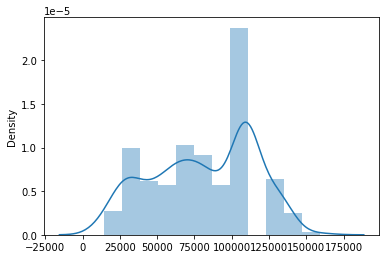

C:\Users\somya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


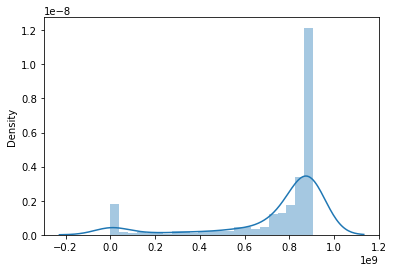

C:\Users\somya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


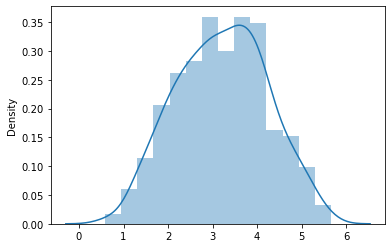

C:\Users\somya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


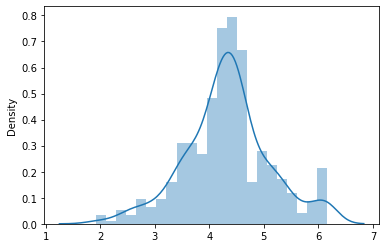

In [176]:
for column in outlier:
    boxcox_transformation(column)

Almost all transformation showing similar result so i am going with log_transformation

In [179]:
def log_transformation(column): #updating column withtransformation result
    df_house[column]=np.log(df_house[column])
   

In [180]:
for column in outlier:
    log_transformation(column)

C:\Users\somya\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


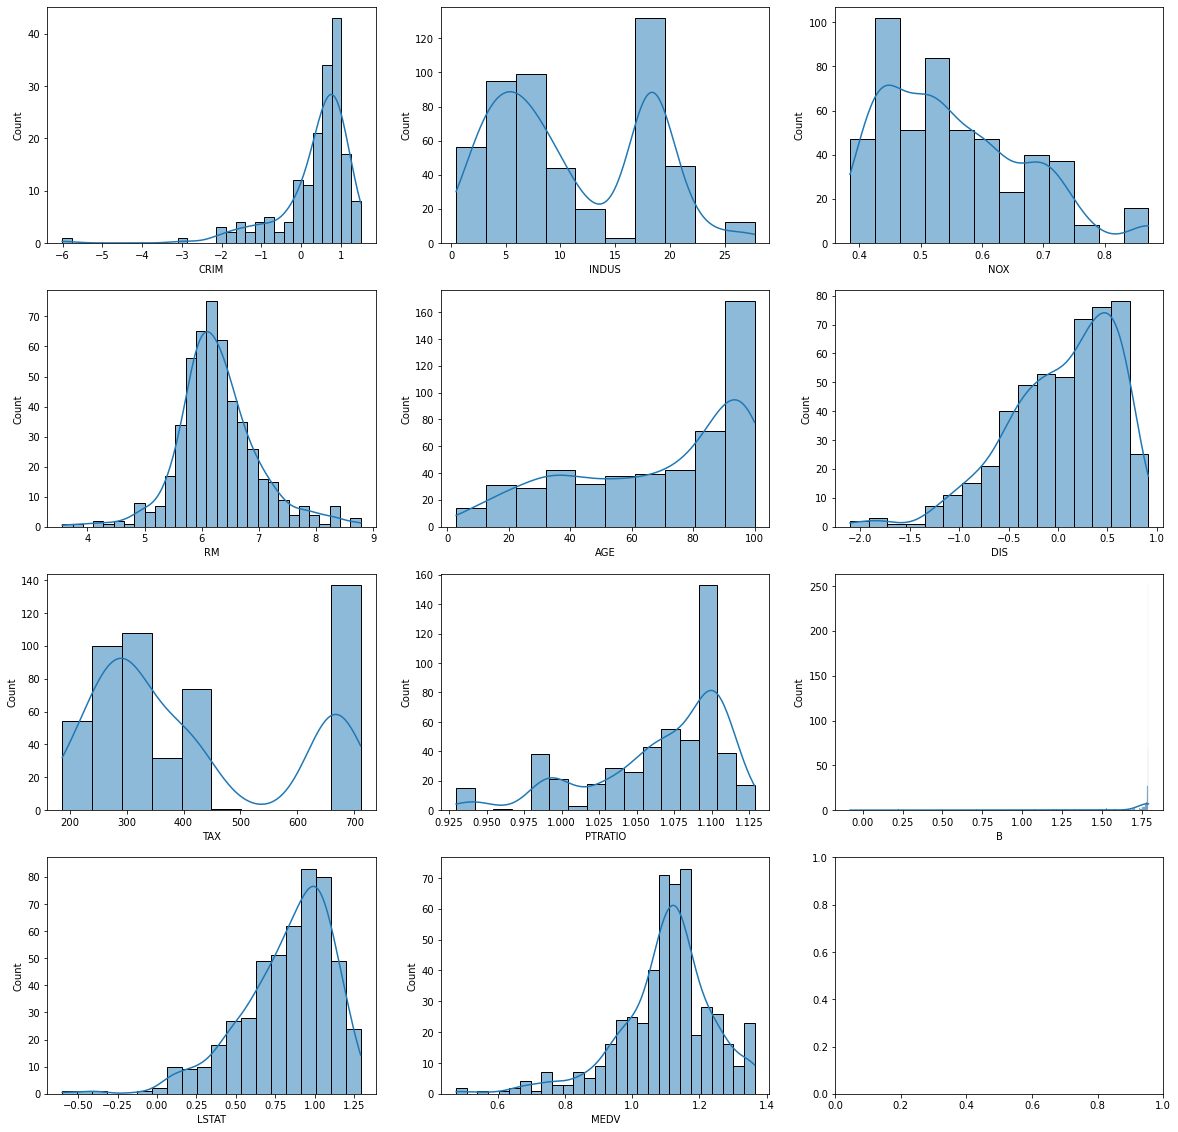

In [184]:
#after transformation
num=df_house.select_dtypes(include='number').columns

_,ax=plt.subplots(4,3,figsize=(20,20))
for i in range(len(num)):
    sns.histplot(data=df_house[num[i]],kde=True,ax=ax[i//3][i%3])

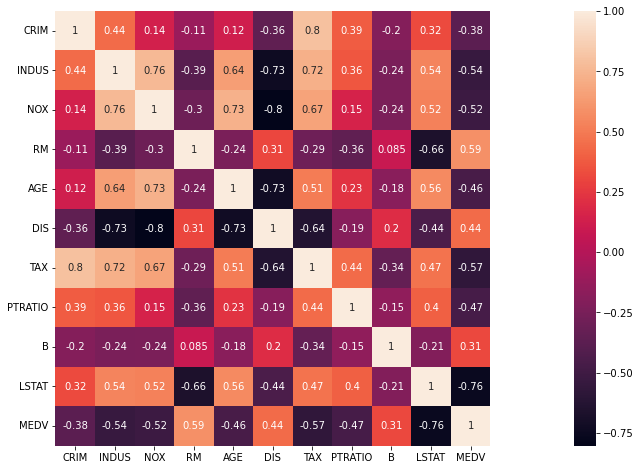

In [198]:
corr = df_house.corr()
plt.figure(figsize=(30,8))
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

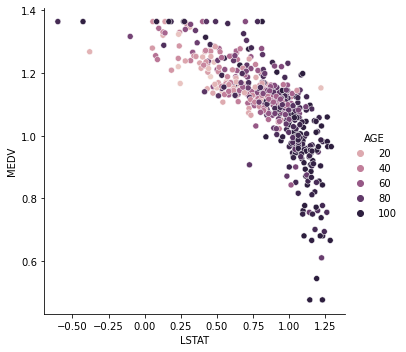

In [218]:
sns.relplot(x='LSTAT', y='MEDV',hue='AGE',  data=df_house) 

<AxesSubplot:xlabel='ZN', ylabel='AGE'>

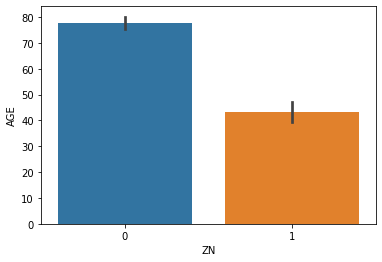

In [242]:
sns.barplot(y='AGE', x='ZN' ,  data=df_house) 